In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

2023-08-27 21:45:49.632699: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 21:45:49.715770: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 21:45:49.717054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 21:45:51.451933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
idx2word = {0: 'ka',
            1: 'kha',
            2: 'gaNge',
            3: 'gaGyi',
            4: 'nga',
            5: 'saLone',
            6: 'saLane',
            7: 'zaGwe',
            8: 'Nya',
            9: 'naKyi',
            10: 'taWanPu',
            11: 'htaSinHtoo',
            12: 'daDwe',
            13: 'daOkeChait',
            14: 'ngaNge',
            15: 'Pa',
            16: 'pha',
            17: 'baHtetChait',
            18: 'baGone',
            19: 'ma',
            20: 'yaPalet',
            21: 'yaGout',
            22: 'La',
            23: 'wa',
            24: 'tha',
            25: 'ha',
            26: 'ah',
            27: 'Ou'}

In [3]:
# Load model via "saved_model" format
model = tf.keras.models.load_model('../model')

2023-08-27 21:45:53.953513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def preprocess_image(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY) # convert to Grayscale
    image = cv2.resize(image, (40, 40), interpolation=cv2.INTER_LINEAR) # rescale the image
    # Apply thresholding to remove noise and enhance contrast
    threshold_value = 130  # Adjust this threshold as needed
    _, image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) # apply threshold to each pixels
    image = tf.cast(image, tf.float32) # cast pixel values to float
    image = 255 - np.array(image)
    # Define the padding values (top, bottom, left, right)
    top = 50
    bottom = 50
    left = 50
    right = 50

    # Define the padding color (white)
    padding_color = [0, 0, 0]

    # Add padding to the image
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR) # rescale the image
    image = tf.expand_dims(image, axis=0) # add dims to the first axis
    image = tf.expand_dims(image, axis=-1) # add dims to the first axis
    
    return image

## Visualization

In [5]:
os.chdir('../images/')
examples = []
for example in os.listdir():
    examples.append(tf.keras.preprocessing.image.load_img(example))

len(examples)

6

1/1 [==============================] - 0s 31ms/step


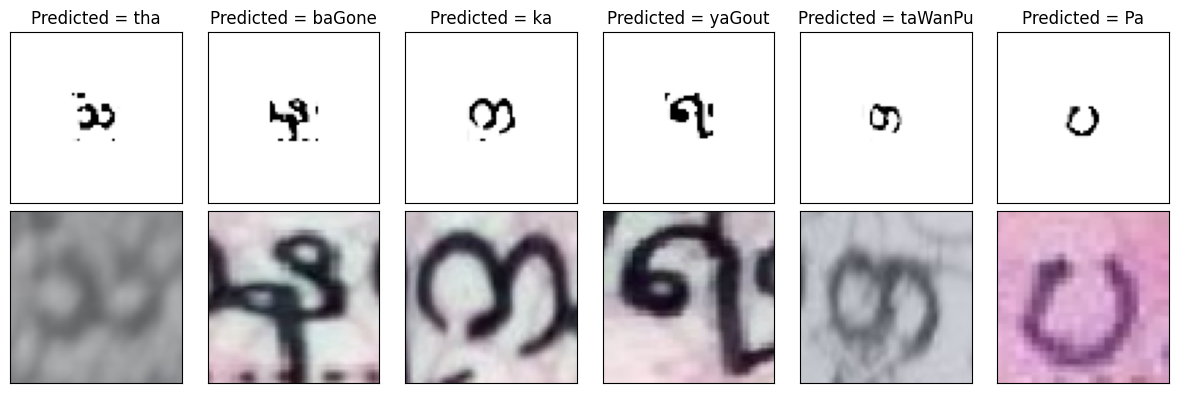

In [6]:
# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(2, 6, figsize=(12, 4))

for i in range(6):  # Display only examples from 0 to 5
    ax = axes[0, i]  # First row
    ax.imshow(tf.squeeze(preprocess_image(examples[i]), axis=0), cmap='Greys')
    pred_label = idx2word.get(np.argmax(model.predict(preprocess_image(examples[i]))))
    ax.set_title(f'Predicted = {pred_label}', size=12)
    ax.set_xticks([]); ax.set_yticks([]) # Hide the axis labels and ticks

    ax = axes[1, i]  # Second row
    ax.imshow(cv2.resize(np.array(examples[i]), (64, 64)), cmap='Greys')
    ax.set_xticks([]); ax.set_yticks([]) # Hide the axis labels and ticks

plt.tight_layout()
plt.show()

---